# 2853, 2853T, 3210 strain stocks vs. ALE1b samples

## Steps

0. Set-up
1. Breseq
2. Ratio of dgoA alleles


In [1]:
## Necessary for running locally (Natascha's laptop)
## Make sure running in appropriate environement

import sys

sys.path.append('/Users/nataschaspahr/code/ai_synbio_data_processing')

In [2]:
%load_ext autoreload
%autoreload 2

## Set-up

In [3]:
import os

base_dir = '/Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25_clonal'
os.makedirs(base_dir, exist_ok = True)

reference = '/Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk'




In [5]:
from binfo_utils import create_manifest
import pandas as pd

manifest = create_manifest('/Users/nataschaspahr/data/seq_data/ALE1b_DNAseq_short_2025-7-14/received')
sample_names_table = pd.read_csv('/Users/nataschaspahr/data/breseq_comparisons/ALE1b_sample_names.csv')

ALE_samples = pd.merge(
    manifest, sample_names_table, left_on='sample_name', right_on= 'WELL'
    ).drop('sample_name', axis=1
    ).rename(columns={'NAME':'sample_name'})

In [98]:
ALE_samples

,fwd_fastq,rvs_fastq,WELL,sample_name
0,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,E10,ALE1b.ACN2853.pyruvate.1.last
1,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,E2,ALE1b.ACN2853_T_dgoA-Best.pyruvate.1.first
2,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,E4,ALE1b.ACN2853_T_dgoA-Best.pyruvate.1.last
3,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,E5,ALE1b.ACN3210.pyruvate.1.first
4,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,E7,ALE1b.ACN3210.pyruvate.1.last
5,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,E8,ALE1b.ACN2853.pyruvate.1.first
6,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,F10,ALE1b.ACN2853.pyruvate.2.last
7,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,F2,ALE1b.ACN2853_T_dgoA-Best.pyruvate.2.first
8,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,F4,ALE1b.ACN2853_T_dgoA-Best.pyruvate.2.last
9,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,F5,ALE1b.ACN3210.pyruvate.2.first


In [100]:
stock_samples = create_manifest('/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed', platform='plasmidsaurus_hybrid')
stock_samples['combined'] = stock_samples['sample_name'].apply(lambda x: x.split('.pyruvate')[0])
stock_samples = stock_samples.loc[stock_samples['combined'].str.contains('2853') | stock_samples['combined'].str.contains('3210')]
stock_samples.reset_index(drop=True, inplace=True)
stock_samples = stock_samples.groupby('combined')[['fwd_fastq', 'rvs_fastq']].agg(list)
stock_samples.reset_index(inplace=True)
stock_samples = stock_samples.rename(columns={'combined': 'sample_name'})

In [7]:
manifest = pd.concat([stock_samples, ALE_samples], axis=0)
manifest

,sample_name,fwd_fastq,rvs_fastq,WELL
0,ANLstock.ACN2853,[/Users/nataschaspahr/data/seq_data/Plasmidsau...,[/Users/nataschaspahr/data/seq_data/Plasmidsau...,NaN
1,ANLstock.ACN2853_T_dgoA-Best,[/Users/nataschaspahr/data/seq_data/Plasmidsau...,[/Users/nataschaspahr/data/seq_data/Plasmidsau...,NaN
2,ANLstock.ACN3210,[/Users/nataschaspahr/data/seq_data/Plasmidsau...,[/Users/nataschaspahr/data/seq_data/Plasmidsau...,NaN
0,ALE1b.ACN2853.pyruvate.1.last,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,E10
1,ALE1b.ACN2853_T_dgoA-Best.pyruvate.1.first,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,E2
2,ALE1b.ACN2853_T_dgoA-Best.pyruvate.1.last,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,E4
3,ALE1b.ACN3210.pyruvate.1.first,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,E5
4,ALE1b.ACN3210.pyruvate.1.last,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,E7
5,ALE1b.ACN2853.pyruvate.1.first,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,E8
6,ALE1b.ACN2853.pyruvate.2.last,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,F10


## Breseq

In [55]:
from breseq import run_breseq
import os

for _, row in manifest.iterrows():
    sample_dir = os.path.join(base_dir, row['sample_name'])
    os.makedirs(sample_dir, exist_ok=True)
    run_breseq(reference, sample_dir, row['fwd_fastq'], row['rvs_fastq'], polymorphism_prediction=False, fold_coverage=200)

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_r

breseq 0.39.0     http://barricklab.org/breseq

Active Developers: Barrick JE, Deatherage DE
Contact:           <jeffrey.e.barrick@gmail.com>

breseq is free software; you can redistribute it and/or modify it under the
terms the GNU General Public License as published by the Free Software 
Foundation; either version 2, or (at your option) any later version.

Copyright (c) 2008-2010 Michigan State University
Copyright (c) 2011-2022 The University of Texas at Austin

If you use breseq in your research, please cite:

  Deatherage, D.E., Barrick, J.E. (2014) Identification of mutations
  in laboratory-evolved microbes from next-generation sequencing
  data using breseq. Methods Mol. Biol. 1151: 165–188.

If you use structural variation (junction) predictions, please cite:

  Barrick, J.E., Colburn, G., Deatherage D.E., Traverse, C.C.,
  Strand, M.D., Borges, J.J., Knoester, D.B., Reba, A., Meyer, A.G. 
  (2014) Identifying structural variation in haploid microbial genomes 
  from short-rea

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
    ALIGNED READ:2000000
    ALIGNED READ:2100000
    ALIGNED READ:2200000
    ALIGNED READ:2300000
    ALIGNED READ:2400000
    ALIGNED READ:2500000
    ALIGNED READ:2600000
    ALIGNED READ:2700000
    ALIGNED READ:2800000
    ALIGNED READ:2900000
    ALIGNED READ:3000000
    ALIGNED READ:3100000
    ALIGNED READ:3200000
    ALIGNED READ:3300000
    ALIGNED READ:3400000
    ALIGNED READ:3500000
    ALIGNED READ:3600000
    ALIGNED READ:3700000
    ALIGNED READ:3800000
    ALIGNED READ:3900000
    ALIGNED READ:4000000
    ALIGN

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz /Users/natasc

---> bowtie2  :: version 2.5.4 [/opt/anaconda3/envs/bre_env/bin/bowtie2]
---> bowtie2  :: NOTE :: breseq output may vary slightly depending on your bowtie2 version,
---> bowtie2  :: NOTE :: and occasionally bowtie2 versions may have bugs that cause crashes.
---> bowtie2  :: NOTE :: bowtie2 version 2.4.5 is recommended with this breseq version.
---> R        :: version 4.4.2 [/opt/anaconda3/envs/bre_env/bin/R]
+++   NOW PROCESSING Read and reference sequence file input
  READ FILE::ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed
    Converting/filtering FASTQ file...
    Original base quality format: SANGER New format: SANGER
    Original reads: 20481067 bases: 3091913899
    Filtered reads: 15713523 bases: 2372185044 (coverage limit option)
    Filtered reads:       32 bases:       4625 (≥90.0% same base)
    Analyzed reads:  4767512 bases:  719724230
  READ FILE::ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed
  ::SKI

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
    ALIGNED READ:2000000
    ALIGNED READ:2100000
    ALIGNED READ:2200000
    ALIGNED READ:2300000
    ALIGNED READ:2400000
    ALIGNED READ:2500000
    ALIGNED READ:2600000
    ALIGNED READ:2700000
    ALIGNED READ:2800000
    ALIGNED READ:2900000
    ALIGNED READ:3000000
    ALIGNED READ:3100000
    ALIGNED READ:3200000
    ALIGNED READ:3300000
    ALIGNED READ:3400000
    ALIGNED READ:3500000
    ALIGNED READ:3600000
    ALIGNED READ:3700000
    ALIGNED READ:3800000
    ALIGNED READ:3900000
    ALIGNED READ:4000000
    ALIGN

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_r

---> bowtie2  :: version 2.5.4 [/opt/anaconda3/envs/bre_env/bin/bowtie2]
---> bowtie2  :: NOTE :: breseq output may vary slightly depending on your bowtie2 version,
---> bowtie2  :: NOTE :: and occasionally bowtie2 versions may have bugs that cause crashes.
---> bowtie2  :: NOTE :: bowtie2 version 2.4.5 is recommended with this breseq version.
---> R        :: version 4.4.2 [/opt/anaconda3/envs/bre_env/bin/R]
+++   NOW PROCESSING Read and reference sequence file input
  READ FILE::ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed
    Converting/filtering FASTQ file...
    Original base quality format: SANGER New format: SANGER
    Original reads: 21832566 bases: 3295936318
    Filtered reads: 17065053 bases: 2576211240 (coverage limit option)
    Filtered reads:        6 bases:        829 (≥90.0% same base)
    Analyzed reads:  4767507 bases:  719724249
  READ FILE::ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed
  ::SKIPPED DUE TO REACHING COV

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
    ALIGNED READ:2000000
    ALIGNED READ:2100000
    ALIGNED READ:2200000
    ALIGNED READ:2300000
    ALIGNED READ:2400000
    ALIGNED READ:2500000
    ALIGNED READ:2600000
    ALIGNED READ:2700000
    ALIGNED READ:2800000
    ALIGNED READ:2900000
    ALIGNED READ:3000000
    ALIGNED READ:3100000
    ALIGNED READ:3200000
    ALIGNED READ:3300000
    ALIGNED READ:3400000
    ALIGNED READ:3500000
    ALIGNED READ:3600000
    ALIGNED READ:3700000
    ALIGNED READ:3800000
    ALIGNED READ:3900000
    ALIGNED READ:4000000
    ALIGN

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk /Users/nataschaspahr/data/seq_data/ALE1b_DNAseq_short_2025-7-14/received/E10_S6_L001_R1_001.fastq.gz /Users/nataschaspahr/data/seq_data/ALE1b_DNAseq_short_2025-7-14/received/E10_S6_L001_R2_001.fastq.gz --genbank-field-for-seq-id ACCESSION --output /Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25/ALE1b.ACN2853.pyruvate.1.last -j 10 --limit-fold-coverage 200


breseq 0.39.0     http://barricklab.org/breseq

Active Developers: Barrick JE, Deatherage DE
Contact:           <jeffrey.e.barrick@gmail.com>

breseq is free software; you can redistribute it and/or modify it under the
terms the GNU General Public License as published by the Free Software 
Foundation; either version 2, or (at your option) any later version.

Copyright (c) 2008-2010 Michigan State University
Copyright (c) 2011-2022 The University of Texas at Austin

If you use breseq in your research, please cite:

  Deatherage, D.E., Barrick, J.E. (2014) Identification of mutations
  in laboratory-evolved microbes from next-generation sequencing
  data using breseq. Methods Mol. Biol. 1151: 165–188.

If you use structural variation (junction) predictions, please cite:

  Barrick, J.E., Colburn, G., Deatherage D.E., Traverse, C.C.,
  Strand, M.D., Borges, J.J., Knoester, D.B., Reba, A., Meyer, A.G. 
  (2014) Identifying structural variation in haploid microbial genomes 
  from short-rea

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
  READ FILE::E10_S6_L001_R2_001
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
  Summary... 
  Aligned reads:                              1281490
  Read alignments:                            1404913
  Alignments split on indels:                     630
  Reads with alignments split on indels:          426
  Split alignments:                            114615
  Reads with split alignments:                  25754
+++   NOW PROCESSING Preliminary analysis of coverage distribution
[samtools] import /Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25/ALE1b.ACN2853.pyruvate.1.last/data/reference.fasta.fai /Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25/ALE1b.ACN2853.pyruvate.1.last/03_candidate_junctions/best.sam /Users/nataschasp

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk /Users/nataschaspahr/data/seq_data/ALE1b_DNAseq_short_2025-7-14/received/E2_S1_L001_R1_001.fastq.gz /Users/nataschaspahr/data/seq_data/ALE1b_DNAseq_short_2025-7-14/received/E2_S1_L001_R2_001.fastq.gz --genbank-field-for-seq-id ACCESSION --output /Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25/ALE1b.ACN2853_T_dgoA-Best.pyruvate.1.first -j 10 --limit-fold-coverage 200


  READ FILE::E2_S1_L001_R1_001
    Converting/filtering FASTQ file...
    Original base quality format: SANGER New format: SANGER
    Original reads: 1117271 bases: 280435021
    Filtered reads: none
    Analyzed reads: 1117271 bases: 280435021
  READ FILE::E2_S1_L001_R2_001
    Converting/filtering FASTQ file...
    Original base quality format: SANGER New format: SANGER
    Original reads: 1117271 bases: 280435021
    Filtered reads:      91 bases:     22841 (≥50.0% bases N)
    Filtered reads:      12 bases:      3012 (≥90.0% same base)
    Analyzed reads: 1117168 bases: 280409168
  ::TOTAL::
    Original reads: 2234542 bases: 560870042
    Analyzed reads: 2234439 bases: 560844189
[samtools] faidx /Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25/ALE1b.ACN2853_T_dgoA-Best.pyruvate.1.first/data/reference.fasta
  REFERENCE: NC_005966
  LENGTH: 3598621
+++   NOW PROCESSING Read alignment to reference genome
[system] bowtie2-build -q "/Users/nataschaspahr/data/breseq_compariso

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
  READ FILE::E2_S1_L001_R2_001
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
    ALIGNED READ:2000000
    ALIGNED READ:2100000
  Summary... 
  Aligned reads:                              2113436
  Read alignments:                            2380658
  Alignments split on indels:                     886
  Reads with alignments split on indels:          664
  Split alignments:                            356215
  Reads with split alignments:                  99876
+++   NOW PROCESSING Preliminary analysis of coverage distribution
[samtools] import /Users/nataschaspahr/data/bres

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk /Users/nataschaspahr/data/seq_data/ALE1b_DNAseq_short_2025-7-14/received/E4_S2_L001_R1_001.fastq.gz /Users/nataschaspahr/data/seq_data/ALE1b_DNAseq_short_2025-7-14/received/E4_S2_L001_R2_001.fastq.gz --genbank-field-for-seq-id ACCESSION --output /Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25/ALE1b.ACN2853_T_dgoA-Best.pyruvate.1.last -j 10 --limit-fold-coverage 200


---> bowtie2  :: version 2.5.4 [/opt/anaconda3/envs/bre_env/bin/bowtie2]
---> bowtie2  :: NOTE :: breseq output may vary slightly depending on your bowtie2 version,
---> bowtie2  :: NOTE :: and occasionally bowtie2 versions may have bugs that cause crashes.
---> bowtie2  :: NOTE :: bowtie2 version 2.4.5 is recommended with this breseq version.
---> R        :: version 4.4.2 [/opt/anaconda3/envs/bre_env/bin/R]
+++   NOW PROCESSING Read and reference sequence file input
  READ FILE::E4_S2_L001_R1_001
    Converting/filtering FASTQ file...
    Original base quality format: SANGER New format: SANGER
    Original reads: 1011186 bases: 253807686
    Filtered reads: none
    Analyzed reads: 1011186 bases: 253807686
  READ FILE::E4_S2_L001_R2_001
    Converting/filtering FASTQ file...
    Original base quality format: SANGER New format: SANGER
    Original reads: 1011186 bases: 253807686
    Filtered reads:      72 bases:     18072 (≥50.0% bases N)
    Filtered reads:      10 bases:      2510 

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
  READ FILE::E4_S2_L001_R2_001
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
  Summary... 
  Aligned reads:                              1942724
  Read alignments:                            2163575
  Alignments split on indels:                     920
  Reads with alignments split on indels:          682
  Split alignments:                            267704
  Reads with split alignments:                  68486
+++   NOW PROCESSING Preliminary analysis of coverage distribution
[samtools] import /Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25/ALE1b.ACN2853_T_dgoA

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk /Users/nataschaspahr/data/seq_data/ALE1b_DNAseq_short_2025-7-14/received/E5_S3_L001_R1_001.fastq.gz /Users/nataschaspahr/data/seq_data/ALE1b_DNAseq_short_2025-7-14/received/E5_S3_L001_R2_001.fastq.gz --genbank-field-for-seq-id ACCESSION --output /Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25/ALE1b.ACN3210.pyruvate.1.first -j 10 --limit-fold-coverage 200


---> bowtie2  :: version 2.5.4 [/opt/anaconda3/envs/bre_env/bin/bowtie2]
---> bowtie2  :: NOTE :: breseq output may vary slightly depending on your bowtie2 version,
---> bowtie2  :: NOTE :: and occasionally bowtie2 versions may have bugs that cause crashes.
---> bowtie2  :: NOTE :: bowtie2 version 2.4.5 is recommended with this breseq version.
---> R        :: version 4.4.2 [/opt/anaconda3/envs/bre_env/bin/R]
+++   NOW PROCESSING Read and reference sequence file input
  READ FILE::E5_S3_L001_R1_001
    Converting/filtering FASTQ file...
    Original base quality format: SANGER New format: SANGER
    Original reads: 1008314 bases: 253086814
    Filtered reads: none
    Analyzed reads: 1008314 bases: 253086814
  READ FILE::E5_S3_L001_R2_001
    Converting/filtering FASTQ file...
    Original base quality format: SANGER New format: SANGER
    Original reads: 1008314 bases: 253086814
    Filtered reads:      79 bases:     19829 (≥50.0% bases N)
    Filtered reads:      12 bases:      3012 

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
  READ FILE::E5_S3_L001_R2_001
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
  Summary... 
  Aligned reads:                              1949992
  Read alignments:                            2166754
  Alignments split on indels:                     996
  Reads with alignments split on indels:          720
  Split alignments:                            250511
  Reads with split alignments:                  63781
+++   NOW PROCESSING Preliminary analysis of coverage distribution
[samtools] import /Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25/ALE1b.ACN3210.pyruva

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk /Users/nataschaspahr/data/seq_data/ALE1b_DNAseq_short_2025-7-14/received/E7_S4_L001_R1_001.fastq.gz /Users/nataschaspahr/data/seq_data/ALE1b_DNAseq_short_2025-7-14/received/E7_S4_L001_R2_001.fastq.gz --genbank-field-for-seq-id ACCESSION --output /Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25/ALE1b.ACN3210.pyruvate.1.last -j 10 --limit-fold-coverage 200


---> bowtie2  :: version 2.5.4 [/opt/anaconda3/envs/bre_env/bin/bowtie2]
---> bowtie2  :: NOTE :: breseq output may vary slightly depending on your bowtie2 version,
---> bowtie2  :: NOTE :: and occasionally bowtie2 versions may have bugs that cause crashes.
---> bowtie2  :: NOTE :: bowtie2 version 2.4.5 is recommended with this breseq version.
---> R        :: version 4.4.2 [/opt/anaconda3/envs/bre_env/bin/R]
+++   NOW PROCESSING Read and reference sequence file input
  READ FILE::E7_S4_L001_R1_001
    Converting/filtering FASTQ file...
    Original base quality format: SANGER New format: SANGER
    Original reads: 1219458 bases: 306083958
    Filtered reads: none
    Analyzed reads: 1219458 bases: 306083958
  READ FILE::E7_S4_L001_R2_001
    Converting/filtering FASTQ file...
    Original base quality format: SANGER New format: SANGER
    Original reads: 1219458 bases: 306083958
    Filtered reads:      95 bases:     23845 (≥50.0% bases N)
    Filtered reads:      13 bases:      3263 

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
  READ FILE::E7_S4_L001_R2_001
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
    ALIGNED READ:2000000
    ALIGNED READ:2100000
    ALIGNED READ:2200000
    ALIGNED READ:2300000
  Summary... 
  Aligned reads:                              2363111
  Read alignments:                            2611309
  Alignments split on indels:                    1176
  Reads with alignments split on indels:          892
  Split alignments:                            288249
  Reads with split alignments:                  70572
+++   NOW PROCESSING Preliminary analysis of coverage distributio

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk /Users/nataschaspahr/data/seq_data/ALE1b_DNAseq_short_2025-7-14/received/E8_S5_L001_R1_001.fastq.gz /Users/nataschaspahr/data/seq_data/ALE1b_DNAseq_short_2025-7-14/received/E8_S5_L001_R2_001.fastq.gz --genbank-field-for-seq-id ACCESSION --output /Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25/ALE1b.ACN2853.pyruvate.1.first -j 10 --limit-fold-coverage 200


---> bowtie2  :: version 2.5.4 [/opt/anaconda3/envs/bre_env/bin/bowtie2]
---> bowtie2  :: NOTE :: breseq output may vary slightly depending on your bowtie2 version,
---> bowtie2  :: NOTE :: and occasionally bowtie2 versions may have bugs that cause crashes.
---> bowtie2  :: NOTE :: bowtie2 version 2.4.5 is recommended with this breseq version.
---> R        :: version 4.4.2 [/opt/anaconda3/envs/bre_env/bin/R]
+++   NOW PROCESSING Read and reference sequence file input
  READ FILE::E8_S5_L001_R1_001
    Converting/filtering FASTQ file...
    Original base quality format: SANGER New format: SANGER
    Original reads: 755114 bases: 189533614
    Filtered reads:      1 bases:       251 (≥90.0% same base)
    Analyzed reads: 755113 bases: 189533363
  READ FILE::E8_S5_L001_R2_001
    Converting/filtering FASTQ file...
    Original base quality format: SANGER New format: SANGER
    Original reads: 755114 bases: 189533614
    Filtered reads:     54 bases:     13554 (≥50.0% bases N)
    Filtere

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
  READ FILE::E8_S5_L001_R2_001
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
  Summary... 
  Aligned reads:                              1421914
  Read alignments:                            1561940
  Alignments split on indels:                     711
  Reads with alignments split on indels:          532
  Split alignments:                            140875
  Reads with split alignments:                  32134
+++   NOW PROCESSING Preliminary analysis of coverage distribution
[samtools] import /Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25/ALE1b.ACN2853.pyruvate.1.first/data/reference.fasta.fai /Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25/ALE1b.ACN2853.pyruvate.1.firs

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk /Users/nataschaspahr/data/seq_data/ALE1b_DNAseq_short_2025-7-14/received/F10_S12_L001_R1_001.fastq.gz /Users/nataschaspahr/data/seq_data/ALE1b_DNAseq_short_2025-7-14/received/F10_S12_L001_R2_001.fastq.gz --genbank-field-for-seq-id ACCESSION --output /Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25/ALE1b.ACN2853.pyruvate.2.last -j 10 --limit-fold-coverage 200


---> bowtie2  :: version 2.5.4 [/opt/anaconda3/envs/bre_env/bin/bowtie2]
---> bowtie2  :: NOTE :: breseq output may vary slightly depending on your bowtie2 version,
---> bowtie2  :: NOTE :: and occasionally bowtie2 versions may have bugs that cause crashes.
---> bowtie2  :: NOTE :: bowtie2 version 2.4.5 is recommended with this breseq version.
---> R        :: version 4.4.2 [/opt/anaconda3/envs/bre_env/bin/R]
+++   NOW PROCESSING Read and reference sequence file input
  READ FILE::F10_S12_L001_R1_001
    Converting/filtering FASTQ file...
    Original base quality format: SANGER New format: SANGER
    Original reads: 703095 bases: 176476845
    Filtered reads: none
    Analyzed reads: 703095 bases: 176476845
  READ FILE::F10_S12_L001_R2_001
    Converting/filtering FASTQ file...
    Original base quality format: SANGER New format: SANGER
    Original reads: 703095 bases: 176476845
    Filtered reads:     45 bases:     11295 (≥50.0% bases N)
    Filtered reads:     12 bases:      3012 (

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
  READ FILE::F10_S12_L001_R2_001
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
  Summary... 
  Aligned reads:                              1319208
  Read alignments:                            1450037
  Alignments split on indels:                     647
  Reads with alignments split on indels:          486
  Split alignments:                            144213
  Reads with split alignments:                  32331
+++   NOW PROCESSING Preliminary analysis of coverage distribution
[samtools] import /Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25/ALE1b.ACN2853.pyruvate.2.last/data/reference.fasta.fai /Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25/ALE1b.ACN2853.pyruvate.2.last/03_candidate_junctions/

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk /Users/nataschaspahr/data/seq_data/ALE1b_DNAseq_short_2025-7-14/received/F2_S7_L001_R1_001.fastq.gz /Users/nataschaspahr/data/seq_data/ALE1b_DNAseq_short_2025-7-14/received/F2_S7_L001_R2_001.fastq.gz --genbank-field-for-seq-id ACCESSION --output /Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25/ALE1b.ACN2853_T_dgoA-Best.pyruvate.2.first -j 10 --limit-fold-coverage 200


---> bowtie2  :: version 2.5.4 [/opt/anaconda3/envs/bre_env/bin/bowtie2]
---> bowtie2  :: NOTE :: breseq output may vary slightly depending on your bowtie2 version,
---> bowtie2  :: NOTE :: and occasionally bowtie2 versions may have bugs that cause crashes.
---> bowtie2  :: NOTE :: bowtie2 version 2.4.5 is recommended with this breseq version.
---> R        :: version 4.4.2 [/opt/anaconda3/envs/bre_env/bin/R]
+++   NOW PROCESSING Read and reference sequence file input
  READ FILE::F2_S7_L001_R1_001
    Converting/filtering FASTQ file...
    Original base quality format: SANGER New format: SANGER
    Original reads: 1322436 bases: 331931436
    Filtered reads: none
    Analyzed reads: 1322436 bases: 331931436
  READ FILE::F2_S7_L001_R2_001
    Converting/filtering FASTQ file...
    Original base quality format: SANGER New format: SANGER
    Original reads: 1322436 bases: 331931436
    Filtered reads:     110 bases:     27610 (≥50.0% bases N)
    Filtered reads:      12 bases:      3012 

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
  READ FILE::F2_S7_L001_R2_001
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
    ALIGNED READ:2000000
    ALIGNED READ:2100000
    ALIGNED READ:2200000
    ALIGNED READ:2300000
    ALIGNED READ:2400000
    ALIGNED READ:2500000
  Summary... 
  Aligned reads:                              2557353
  Read alignments:                            2819646
  Alignments split on indels:                    1288
  Reads with alignments split on indels:          991
  Split alignments:                            299886
  Reads with split alignments:                  66723
+++   NOW PROCE

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk /Users/nataschaspahr/data/seq_data/ALE1b_DNAseq_short_2025-7-14/received/F4_S8_L001_R1_001.fastq.gz /Users/nataschaspahr/data/seq_data/ALE1b_DNAseq_short_2025-7-14/received/F4_S8_L001_R2_001.fastq.gz --genbank-field-for-seq-id ACCESSION --output /Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25/ALE1b.ACN2853_T_dgoA-Best.pyruvate.2.last -j 10 --limit-fold-coverage 200


---> bowtie2  :: version 2.5.4 [/opt/anaconda3/envs/bre_env/bin/bowtie2]
---> bowtie2  :: NOTE :: breseq output may vary slightly depending on your bowtie2 version,
---> bowtie2  :: NOTE :: and occasionally bowtie2 versions may have bugs that cause crashes.
---> bowtie2  :: NOTE :: bowtie2 version 2.4.5 is recommended with this breseq version.
---> R        :: version 4.4.2 [/opt/anaconda3/envs/bre_env/bin/R]
+++   NOW PROCESSING Read and reference sequence file input
  READ FILE::F4_S8_L001_R1_001
    Converting/filtering FASTQ file...
    Original base quality format: SANGER New format: SANGER
    Original reads: 883041 bases: 221643291
    Filtered reads: none
    Analyzed reads: 883041 bases: 221643291
  READ FILE::F4_S8_L001_R2_001
    Converting/filtering FASTQ file...
    Original base quality format: SANGER New format: SANGER
    Original reads: 883041 bases: 221643291
    Filtered reads:     63 bases:     15813 (≥50.0% bases N)
    Filtered reads:     10 bases:      2510 (≥90.

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
  READ FILE::F4_S8_L001_R2_001
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
  Summary... 
  Aligned reads:                              1718608
  Read alignments:                            1891640
  Alignments split on indels:                     955
  Reads with alignments split on indels:          695
  Split alignments:                            180228
  Reads with split alignments:                  39176
+++   NOW PROCESSING Preliminary analysis of coverage distribution
[samtools] import /Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25/ALE1b.ACN2853_T_dgoA-Best.pyruvate.2.last/data/reference.fasta.fai /Us

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk /Users/nataschaspahr/data/seq_data/ALE1b_DNAseq_short_2025-7-14/received/F5_S9_L001_R1_001.fastq.gz /Users/nataschaspahr/data/seq_data/ALE1b_DNAseq_short_2025-7-14/received/F5_S9_L001_R2_001.fastq.gz --genbank-field-for-seq-id ACCESSION --output /Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25/ALE1b.ACN3210.pyruvate.2.first -j 10 --limit-fold-coverage 200


---> bowtie2  :: version 2.5.4 [/opt/anaconda3/envs/bre_env/bin/bowtie2]
---> bowtie2  :: NOTE :: breseq output may vary slightly depending on your bowtie2 version,
---> bowtie2  :: NOTE :: and occasionally bowtie2 versions may have bugs that cause crashes.
---> bowtie2  :: NOTE :: bowtie2 version 2.4.5 is recommended with this breseq version.
---> R        :: version 4.4.2 [/opt/anaconda3/envs/bre_env/bin/R]
+++   NOW PROCESSING Read and reference sequence file input
  READ FILE::F5_S9_L001_R1_001
    Converting/filtering FASTQ file...
    Original base quality format: SANGER New format: SANGER
    Original reads: 1347697 bases: 338271947
    Filtered reads: none
    Analyzed reads: 1347697 bases: 338271947
  READ FILE::F5_S9_L001_R2_001
    Converting/filtering FASTQ file...
    Original base quality format: SANGER New format: SANGER
    Original reads: 1347697 bases: 338271947
    Filtered reads:      86 bases:     21586 (≥50.0% bases N)
    Filtered reads:      18 bases:      4518 

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
  READ FILE::F5_S9_L001_R2_001
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
    ALIGNED READ:2000000
    ALIGNED READ:2100000
    ALIGNED READ:2200000
    ALIGNED READ:2300000
    ALIGNED READ:2400000
    ALIGNED READ:2500000
    ALIGNED READ:2600000
  Summary... 
  Aligned reads:                              2616368
  Read alignments:                            2880044
  Alignments split on indels:                    1377
  Reads with alignments split on indels:         1028
  Split alignments:                            284097
  Reads with split alignments:              

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk /Users/nataschaspahr/data/seq_data/ALE1b_DNAseq_short_2025-7-14/received/F7_S10_L001_R1_001.fastq.gz /Users/nataschaspahr/data/seq_data/ALE1b_DNAseq_short_2025-7-14/received/F7_S10_L001_R2_001.fastq.gz --genbank-field-for-seq-id ACCESSION --output /Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25/ALE1b.ACN3210.pyruvate.2.last -j 10 --limit-fold-coverage 200


---> bowtie2  :: version 2.5.4 [/opt/anaconda3/envs/bre_env/bin/bowtie2]
---> bowtie2  :: NOTE :: breseq output may vary slightly depending on your bowtie2 version,
---> bowtie2  :: NOTE :: and occasionally bowtie2 versions may have bugs that cause crashes.
---> bowtie2  :: NOTE :: bowtie2 version 2.4.5 is recommended with this breseq version.
---> R        :: version 4.4.2 [/opt/anaconda3/envs/bre_env/bin/R]
+++   NOW PROCESSING Read and reference sequence file input
  READ FILE::F7_S10_L001_R1_001
    Converting/filtering FASTQ file...
    Original base quality format: SANGER New format: SANGER
    Original reads: 1205041 bases: 302465291
    Filtered reads: none
    Analyzed reads: 1205041 bases: 302465291
  READ FILE::F7_S10_L001_R2_001
    Converting/filtering FASTQ file...
    Original base quality format: SANGER New format: SANGER
    Original reads: 1205041 bases: 302465291
    Filtered reads:      81 bases:     20331 (≥50.0% bases N)
    Filtered reads:      10 bases:      251

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
  READ FILE::F7_S10_L001_R2_001
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
    ALIGNED READ:2000000
    ALIGNED READ:2100000
    ALIGNED READ:2200000
    ALIGNED READ:2300000
  Summary... 
  Aligned reads:                              2323865
  Read alignments:                            2565417
  Alignments split on indels:                    1181
  Reads with alignments split on indels:          860
  Split alignments:                            270639
  Reads with split alignments:                  59615
+++   NOW PROCESSING Preliminary analysis of coverage distributi

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk /Users/nataschaspahr/data/seq_data/ALE1b_DNAseq_short_2025-7-14/received/F8_S11_L001_R1_001.fastq.gz /Users/nataschaspahr/data/seq_data/ALE1b_DNAseq_short_2025-7-14/received/F8_S11_L001_R2_001.fastq.gz --genbank-field-for-seq-id ACCESSION --output /Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25/ALE1b.ACN2853.pyruvate.2.first -j 10 --limit-fold-coverage 200


---> bowtie2  :: version 2.5.4 [/opt/anaconda3/envs/bre_env/bin/bowtie2]
---> bowtie2  :: NOTE :: breseq output may vary slightly depending on your bowtie2 version,
---> bowtie2  :: NOTE :: and occasionally bowtie2 versions may have bugs that cause crashes.
---> bowtie2  :: NOTE :: bowtie2 version 2.4.5 is recommended with this breseq version.
---> R        :: version 4.4.2 [/opt/anaconda3/envs/bre_env/bin/R]
+++   NOW PROCESSING Read and reference sequence file input
  READ FILE::F8_S11_L001_R1_001
    Converting/filtering FASTQ file...
    Original base quality format: SANGER New format: SANGER
    Original reads: 758164 bases: 190299164
    Filtered reads: none
    Analyzed reads: 758164 bases: 190299164
  READ FILE::F8_S11_L001_R2_001
    Converting/filtering FASTQ file...
    Original base quality format: SANGER New format: SANGER
    Original reads: 758164 bases: 190299164
    Filtered reads:     48 bases:     12048 (≥50.0% bases N)
    Filtered reads:     15 bases:      3765 (≥9

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
  READ FILE::F8_S11_L001_R2_001
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
  Summary... 
  Aligned reads:                              1418369
  Read alignments:                            1558162
  Alignments split on indels:                     615
  Reads with alignments split on indels:          451
  Split alignments:                            149261
  Reads with split alignments:                  33006
+++   NOW PROCESSING Preliminary analysis of coverage distribution
[samtools] import /Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25/ALE1b.ACN2853.pyruvate.2.first/data/reference.fasta.fai /Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25/ALE1b.ACN2853.pyruvate.2.fir

In [8]:
base_dir = '/Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25_pop'
os.makedirs(base_dir, exist_ok = True)

In [9]:
from breseq import run_breseq
import os

for _, row in manifest.iterrows():
    sample_dir = os.path.join(base_dir, row['sample_name'])
    if os.path.exists(sample_dir):
        continue
    else:
        os.makedirs(sample_dir, exist_ok=True)
        run_breseq(reference, sample_dir, row['fwd_fastq'], row['rvs_fastq'], polymorphism_prediction=True, fold_coverage=200)

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_r

breseq 0.39.0     http://barricklab.org/breseq

Active Developers: Barrick JE, Deatherage DE
Contact:           <jeffrey.e.barrick@gmail.com>

breseq is free software; you can redistribute it and/or modify it under the
terms the GNU General Public License as published by the Free Software 
Foundation; either version 2, or (at your option) any later version.

Copyright (c) 2008-2010 Michigan State University
Copyright (c) 2011-2022 The University of Texas at Austin

If you use breseq in your research, please cite:

  Deatherage, D.E., Barrick, J.E. (2014) Identification of mutations
  in laboratory-evolved microbes from next-generation sequencing
  data using breseq. Methods Mol. Biol. 1151: 165–188.

If you use structural variation (junction) predictions, please cite:

  Barrick, J.E., Colburn, G., Deatherage D.E., Traverse, C.C.,
  Strand, M.D., Borges, J.J., Knoester, D.B., Reba, A., Meyer, A.G. 
  (2014) Identifying structural variation in haploid microbial genomes 
  from short-rea

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
    ALIGNED READ:2000000
    ALIGNED READ:2100000
    ALIGNED READ:2200000
    ALIGNED READ:2300000
    ALIGNED READ:2400000
    ALIGNED READ:2500000
    ALIGNED READ:2600000
    ALIGNED READ:2700000
    ALIGNED READ:2800000
    ALIGNED READ:2900000
    ALIGNED READ:3000000
    ALIGNED READ:3100000
    ALIGNED READ:3200000
    ALIGNED READ:3300000
    ALIGNED READ:3400000
    ALIGNED READ:3500000
    ALIGNED READ:3600000
    ALIGNED READ:3700000
    ALIGNED READ:3800000
    ALIGNED READ:3900000
    ALIGNED READ:4000000
    ALIGN

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz /Users/natasc

---> bowtie2  :: version 2.5.4 [/opt/anaconda3/envs/bre_env/bin/bowtie2]
---> bowtie2  :: NOTE :: breseq output may vary slightly depending on your bowtie2 version,
---> bowtie2  :: NOTE :: and occasionally bowtie2 versions may have bugs that cause crashes.
---> bowtie2  :: NOTE :: bowtie2 version 2.4.5 is recommended with this breseq version.
---> R        :: version 4.4.2 [/opt/anaconda3/envs/bre_env/bin/R]
+++   NOW PROCESSING Read and reference sequence file input
  READ FILE::ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed
    Converting/filtering FASTQ file...
    Original base quality format: SANGER New format: SANGER
    Original reads: 20481067 bases: 3091913899
    Filtered reads: 15713523 bases: 2372185044 (coverage limit option)
    Filtered reads:       32 bases:       4625 (≥90.0% same base)
    Analyzed reads:  4767512 bases:  719724230
  READ FILE::ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed
  ::SKI

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
    ALIGNED READ:2000000
    ALIGNED READ:2100000
    ALIGNED READ:2200000
    ALIGNED READ:2300000
    ALIGNED READ:2400000
    ALIGNED READ:2500000
    ALIGNED READ:2600000
    ALIGNED READ:2700000
    ALIGNED READ:2800000
    ALIGNED READ:2900000
    ALIGNED READ:3000000
    ALIGNED READ:3100000
    ALIGNED READ:3200000
    ALIGNED READ:3300000
    ALIGNED READ:3400000
    ALIGNED READ:3500000
    ALIGNED READ:3600000
    ALIGNED READ:3700000
    ALIGNED READ:3800000
    ALIGNED READ:3900000
    ALIGNED READ:4000000
    ALIGN

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_r

  READ FILE::ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed
    Converting/filtering FASTQ file...
    Original base quality format: SANGER New format: SANGER
    Original reads: 21832566 bases: 3295936318
    Filtered reads: 17065053 bases: 2576211240 (coverage limit option)
    Filtered reads:        6 bases:        829 (≥90.0% same base)
    Analyzed reads:  4767507 bases:  719724249
  READ FILE::ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed
  ::SKIPPED DUE TO REACHING COVERAGE LIMIT::
  READ FILE::ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed
  ::SKIPPED DUE TO REACHING COVERAGE LIMIT::
  READ FILE::ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed
  ::SKIPPED DUE TO REACHING COVERAGE LIMIT::
  READ FILE::ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed
  ::SKIPPED DUE TO REACHING COVERAGE LIMIT::
  READ FILE::ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R2_

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
    ALIGNED READ:2000000
    ALIGNED READ:2100000
    ALIGNED READ:2200000
    ALIGNED READ:2300000
    ALIGNED READ:2400000
    ALIGNED READ:2500000
    ALIGNED READ:2600000
    ALIGNED READ:2700000
    ALIGNED READ:2800000
    ALIGNED READ:2900000
    ALIGNED READ:3000000
    ALIGNED READ:3100000
    ALIGNED READ:3200000
    ALIGNED READ:3300000
    ALIGNED READ:3400000
    ALIGNED READ:3500000
    ALIGNED READ:3600000
    ALIGNED READ:3700000
    ALIGNED READ:3800000
    ALIGNED READ:3900000
    ALIGNED READ:4000000
    ALIGN

### Comparison tables

Comparing within each strain

In [19]:
strains = {
    'ACN2853': [
        'ANLstock.ACN2853',
        'ALE1b.ACN2853.pyruvate.1.first',
        'ALE1b.ACN2853.pyruvate.2.first',
        'ALE1b.ACN2853.pyruvate.1.last',
        'ALE1b.ACN2853.pyruvate.2.last',
    ],
    'ACN2853T': [
        'ANLstock.ACN2853_T_dgoA-Best',
        'ALE1b.ACN2853_T_dgoA-Best.pyruvate.1.first',
        'ALE1b.ACN2853_T_dgoA-Best.pyruvate.2.first',
        'ALE1b.ACN2853_T_dgoA-Best.pyruvate.1.last',
        'ALE1b.ACN2853_T_dgoA-Best.pyruvate.2.last',
    ],
    'ACN3210': [
        'ANLstock.ACN3210',
        'ALE1b.ACN3210.pyruvate.1.first',
        'ALE1b.ACN3210.pyruvate.2.first',
        'ALE1b.ACN3210.pyruvate.1.last',
        'ALE1b.ACN3210.pyruvate.2.last',
    ]
}

In [ ]:
# Before doing the genome diff file comparison, must rename files so that they are named correctly in the html output
# Also, must replace '.' in file names, else everything after '.' is discarded

import os
from breseq import compare_gdiff

base_dir = '/Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25'
reference = '/Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk'

for tag in ['_clonal', '_pop']:
    
    for s in strains.keys():
        
        gdiffs = []
        
        for sample in strains[s]:
            old_gd_path = os.path.join(base_dir+tag, sample, 'data/output.gd')
            new_gd_path = os.path.join(base_dir+tag, sample, 'data/output.gd'.replace('output', sample.replace('.', '_')))
            gdiffs.append(new_gd_path)
            os.rename(old_gd_path, new_gd_path)
        
        compare_gdiff(
            reference,
            os.path.join(base_dir+tag, f'{s}_comparison.html'),
            gdiffs
        )


gdtools ANNOTATE/COMPARE [-o annotated.html] -r reference.gbk input.1.gd [input.2.gd ... ]
  -h,--help                        Display detailed help message
  -o,--output <arg>                Path to output file with added mutation data. (DEFAULT: output.*)
  -r,--reference <arg>             File containing reference sequences in GenBank, GFF3, or FASTA format. Option may be provided multiple times for multiple files (REQUIRED)
  -f,--format <arg>                Type of output file to generate. See options below (DEFAULT=HTML)
  -a,--add-html-fields             Add formatted fields that are used for generating HTML output. Only applicable to GD and JSON output formats
  -b,--add-text-fields             Add formatted fields in UTF-8 encoded text that are similar to those used in HTML output. Only applicable to GD, TSV, CSV, and JSON output formats
  --ignore-pseudogenes             Treat pseudogenes as valid ORFs for calling amino acid substitutions
  --repeat-header <arg>            In

breseq 0.39.0     http://barricklab.org/breseq

Active Developers: Barrick JE, Deatherage DE
Contact:           <jeffrey.e.barrick@gmail.com>

breseq is free software; you can redistribute it and/or modify it under the
terms the GNU General Public License as published by the Free Software 
Foundation; either version 2, or (at your option) any later version.

Copyright (c) 2008-2010 Michigan State University
Copyright (c) 2011-2022 The University of Texas at Austin

If you use breseq in your research, please cite:

  Deatherage, D.E., Barrick, J.E. (2014) Identification of mutations
  in laboratory-evolved microbes from next-generation sequencing
  data using breseq. Methods Mol. Biol. 1151: 165–188.

If you use structural variation (junction) predictions, please cite:

  Barrick, J.E., Colburn, G., Deatherage D.E., Traverse, C.C.,
  Strand, M.D., Borges, J.J., Knoester, D.B., Reba, A., Meyer, A.G. 
  (2014) Identifying structural variation in haploid microbial genomes 
  from short-rea

CalledProcessError: Command '['gdtools', 'ANNOTATE', '-r', '/Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk', '-o', '/Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25_clonal/ACN2853_comparison.html', '-f', 'TSV']' returned non-zero exit status 255.

Comparing all samples and stocks

In [94]:
all_samples = [
    'ANLstock.ACN2853',
    'ALE1b.ACN2853.pyruvate.1.first',
    'ALE1b.ACN2853.pyruvate.2.first',
    'ALE1b.ACN2853.pyruvate.1.last',
    'ALE1b.ACN2853.pyruvate.2.last',
    'ANLstock.ACN2853_T_dgoA-Best',
    'ALE1b.ACN2853_T_dgoA-Best.pyruvate.1.first',
    'ALE1b.ACN2853_T_dgoA-Best.pyruvate.2.first',
    'ALE1b.ACN2853_T_dgoA-Best.pyruvate.1.last',
    'ALE1b.ACN2853_T_dgoA-Best.pyruvate.2.last',
    'ANLstock.ACN3210',
    'ALE1b.ACN3210.pyruvate.1.first',
    'ALE1b.ACN3210.pyruvate.2.first',
    'ALE1b.ACN3210.pyruvate.1.last',
    'ALE1b.ACN3210.pyruvate.2.last'
]

In [ ]:
import os
from breseq import compare_gdiff

base_dir = '/Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25'
reference = '/Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk'

for tag in ['_clonal', '_pop']:

    gdiffs = [
        os.path.join(base_dir+tag, s, f'data/{s.replace('.', '_')}.gd')
        for s in all_samples
        ]
    
    compare_gdiff(
        reference,
        os.path.join(base_dir+tag, f'all_{tag}_samples_comparison.html'),
        gdiffs
    )

breseq 0.39.0     http://barricklab.org/breseq

Active Developers: Barrick JE, Deatherage DE
Contact:           <jeffrey.e.barrick@gmail.com>

breseq is free software; you can redistribute it and/or modify it under the
terms the GNU General Public License as published by the Free Software 
Foundation; either version 2, or (at your option) any later version.

Copyright (c) 2008-2010 Michigan State University
Copyright (c) 2011-2022 The University of Texas at Austin

If you use breseq in your research, please cite:

  Deatherage, D.E., Barrick, J.E. (2014) Identification of mutations
  in laboratory-evolved microbes from next-generation sequencing
  data using breseq. Methods Mol. Biol. 1151: 165–188.

If you use structural variation (junction) predictions, please cite:

  Barrick, J.E., Colburn, G., Deatherage D.E., Traverse, C.C.,
  Strand, M.D., Borges, J.J., Knoester, D.B., Reba, A., Meyer, A.G. 
  (2014) Identifying structural variation in haploid microbial genomes 
  from short-rea

In [ ]:
#json format

import os
from breseq import compare_gdiff

base_dir = '/Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25'
reference = '/Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk'

for tag in ['_clonal', '_pop']:

    gdiffs = [
        os.path.join(base_dir+tag, s, f'data/{s.replace('.', '_')}.gd')
        for s in all_samples
        ]
    
    compare_gdiff(
        reference,
        os.path.join(base_dir+tag, f'all_{tag}_samples_comparison.json'),
        gdiffs,
        format='json'
    )

breseq 0.39.0     http://barricklab.org/breseq

Active Developers: Barrick JE, Deatherage DE
Contact:           <jeffrey.e.barrick@gmail.com>

breseq is free software; you can redistribute it and/or modify it under the
terms the GNU General Public License as published by the Free Software 
Foundation; either version 2, or (at your option) any later version.

Copyright (c) 2008-2010 Michigan State University
Copyright (c) 2011-2022 The University of Texas at Austin

If you use breseq in your research, please cite:

  Deatherage, D.E., Barrick, J.E. (2014) Identification of mutations
  in laboratory-evolved microbes from next-generation sequencing
  data using breseq. Methods Mol. Biol. 1151: 165–188.

If you use structural variation (junction) predictions, please cite:

  Barrick, J.E., Colburn, G., Deatherage D.E., Traverse, C.C.,
  Strand, M.D., Borges, J.J., Knoester, D.B., Reba, A., Meyer, A.G. 
  (2014) Identifying structural variation in haploid microbial genomes 
  from short-rea

In [126]:
#tsv format

import os
from breseq import compare_gdiff

base_dir = '/Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25'
reference = '/Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk'

for tag in ['_clonal', '_pop']:

    gdiffs = [
        os.path.join(base_dir+tag, s, f'data/{s.replace('.', '_')}.gd')
        for s in all_samples
        ]
    
    compare_gdiff(
        reference,
        os.path.join(base_dir+tag, f'all_{tag}_samples_comparison.tsv'),
        gdiffs,
        format='tsv'
    )

breseq 0.39.0     http://barricklab.org/breseq

Active Developers: Barrick JE, Deatherage DE
Contact:           <jeffrey.e.barrick@gmail.com>

breseq is free software; you can redistribute it and/or modify it under the
terms the GNU General Public License as published by the Free Software 
Foundation; either version 2, or (at your option) any later version.

Copyright (c) 2008-2010 Michigan State University
Copyright (c) 2011-2022 The University of Texas at Austin

If you use breseq in your research, please cite:

  Deatherage, D.E., Barrick, J.E. (2014) Identification of mutations
  in laboratory-evolved microbes from next-generation sequencing
  data using breseq. Methods Mol. Biol. 1151: 165–188.

If you use structural variation (junction) predictions, please cite:

  Barrick, J.E., Colburn, G., Deatherage D.E., Traverse, C.C.,
  Strand, M.D., Borges, J.J., Knoester, D.B., Reba, A., Meyer, A.G. 
  (2014) Identifying structural variation in haploid microbial genomes 
  from short-rea

In [ ]:
pop = pd.read_csv('/Users/nataschaspahr/data/breseq_comparisons/ALE1b_10-03-25_pop/all__pop_samples_comparison.tsv', sep='\t')
pop['id'] = pop.index
sub = pop[['id', 'frequency', 'title']]
sub

,id,frequency,title
0,0,1.000000,ANLstock_ACN2853
1,1,1.000000,ANLstock_ACN2853
2,2,1.000000,ANLstock_ACN2853
3,3,1.000000,ANLstock_ACN2853
4,4,1.000000,ANLstock_ACN2853
...,...,...,...
3310,3310,1.000000,ALE1b_ACN3210_pyruvate_2_last
3311,3311,0.875001,ALE1b_ACN3210_pyruvate_2_last
3312,3312,0.067757,ALE1b_ACN3210_pyruvate_2_last
3313,3313,0.059474,ALE1b_ACN3210_pyruvate_2_last


In [203]:
pivot = sub.pivot(index = 'id', columns='title', )
pivot = pivot.droplevel(0, axis=1)

In [278]:
pivot

title,ALE1b_ACN2853_T_dgoA-Best_pyruvate_1_first,ALE1b_ACN2853_T_dgoA-Best_pyruvate_1_last,ALE1b_ACN2853_T_dgoA-Best_pyruvate_2_first,ALE1b_ACN2853_T_dgoA-Best_pyruvate_2_last,ALE1b_ACN2853_pyruvate_1_first,ALE1b_ACN2853_pyruvate_1_last,ALE1b_ACN2853_pyruvate_2_first,ALE1b_ACN2853_pyruvate_2_last,ALE1b_ACN3210_pyruvate_1_first,ALE1b_ACN3210_pyruvate_1_last,ALE1b_ACN3210_pyruvate_2_first,ALE1b_ACN3210_pyruvate_2_last,ANLstock_ACN2853,ANLstock_ACN2853_T_dgoA-Best,ANLstock_ACN3210
id,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
3311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.875001,NaN,NaN,NaN
3312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.067757,NaN,NaN,NaN


In [196]:
strainSets = {
    'ACN2853_T_1':
        ['ANLstock_ACN2853_T_dgoA-Best', 'ALE1b_ACN2853_T_dgoA-Best_pyruvate_1_first', 'ALE1b_ACN2853_T_dgoA-Best_pyruvate_1_last'],
    'ACN2853_T_2':
        ['ANLstock_ACN2853_T_dgoA-Best', 'ALE1b_ACN2853_T_dgoA-Best_pyruvate_2_first', 'ALE1b_ACN2853_T_dgoA-Best_pyruvate_2_last'],
    'ACN2853_1':
        ['ANLstock_ACN2853', 'ALE1b_ACN2853_pyruvate_1_first', 'ALE1b_ACN2853_pyruvate_1_last'],
    'ACN2853_2':
        ['ANLstock_ACN2853', 'ALE1b_ACN2853_pyruvate__first', 'ALE1b_ACN2853_pyruvate_2_last'],
    'ANLstock_ACN3210':
        ['ANLstock_ACN3210','ALE1b_ACN3210_pyruvate_1_first', 'ALE1b_ACN3210_pyruvate_1_last',],
    'ANLstock_ACN3210':
        ['ANLstock_ACN3210', 'ALE1b_ACN3210_pyruvate_2_first', 'ALE1b_ACN3210_pyruvate_2_last',],
}

In [ ]:
ACN2853 = pivot[strainSets['ACN2853_T_1']]
ACN2853 = ACN2853.dropna(how='all').fillna(0)

In [ ]:
arr = ACN2853[ACN2853.columns[0]]

In [246]:
import numpy as np

def classify_mutation_frequency_in_test_sample(freq):

    conditions = [
        freq == 0,
        (0 < freq) & (freq < 1),
        freq == 1
    ]
    choices = [
        'none',
        'some',
        'all'
    ]
    default_value = 'other'

    classified = np.select(conditions, choices, default=default_value)
    return str(classified)

In [253]:
out = ACN2853.apply(lambda row: "-".join([classify_mutation_frequency_in_test_sample(x) for x in row]), axis=1)
out

id
1062     all-none-none
1063     all-none-none
1064     all-none-none
1065     all-none-none
1066     all-none-none
             ...      
1901    none-none-some
1902    none-none-some
1903     none-none-all
1904     none-none-all
1905    none-none-some
Length: 606, dtype: object

In [275]:
out.value_counts().values

array([201, 177, 110,  41,  39,  38])

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'some-none-none'),
  Text(1, 0, 'none-none-some'),
  Text(2, 0, 'none-some-none'),
  Text(3, 0, 'all-none-none'),
  Text(4, 0, 'none-none-all'),
  Text(5, 0, 'none-all-none')])

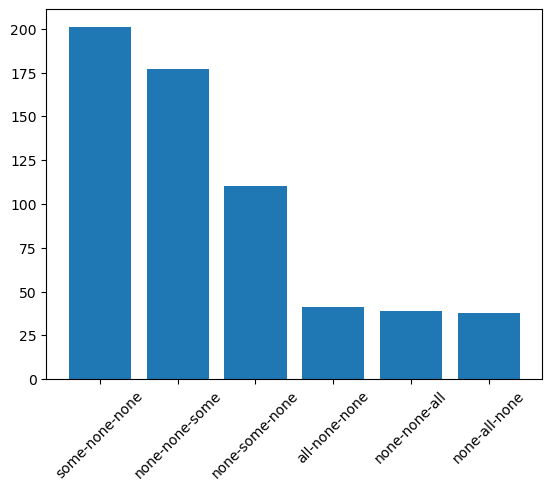

In [277]:
import matplotlib.pyplot as plt

plt.bar(out.value_counts().keys(), out.value_counts().values)
plt.xticks(rotation=45)

In [220]:
import itertools

iterable = ['all', 'some', 'none', 'other']

o=0
for i in itertools.product(iterable, repeat=3):
    o+=1
    print(i)

o

('all', 'all', 'all')
('all', 'all', 'some')
('all', 'all', 'none')
('all', 'all', 'other')
('all', 'some', 'all')
('all', 'some', 'some')
('all', 'some', 'none')
('all', 'some', 'other')
('all', 'none', 'all')
('all', 'none', 'some')
('all', 'none', 'none')
('all', 'none', 'other')
('all', 'other', 'all')
('all', 'other', 'some')
('all', 'other', 'none')
('all', 'other', 'other')
('some', 'all', 'all')
('some', 'all', 'some')
('some', 'all', 'none')
('some', 'all', 'other')
('some', 'some', 'all')
('some', 'some', 'some')
('some', 'some', 'none')
('some', 'some', 'other')
('some', 'none', 'all')
('some', 'none', 'some')
('some', 'none', 'none')
('some', 'none', 'other')
('some', 'other', 'all')
('some', 'other', 'some')
('some', 'other', 'none')
('some', 'other', 'other')
('none', 'all', 'all')
('none', 'all', 'some')
('none', 'all', 'none')
('none', 'all', 'other')
('none', 'some', 'all')
('none', 'some', 'some')
('none', 'some', 'none')
('none', 'some', 'other')
('none', 'none', 'al

64

In [ ]:
cats = [
    ('all', 'all', 'all'),
    ('all')
]

In [ ]:
# Categorize dgoA allele presentation in one flank blast results

def categorize_dgoA(series, position):
    # Condition set 1
    if row['his_tag'] == 0:
        his_tag_cat = 'best=0'
    elif row['his_tag'] == 1:
        his_tag_cat = 'best=1'
    elif row['his_tag'] >= 1:
        his_tag_cat = 'best>=1'
    else:
        his_tag_cat = 'best=other'

    # Condition set 2
    if row['dgoAEc_rv_primer'] == 0:
        dgoAEc_cat = 'Ecoli=0'
    elif row['dgoAEc_rv_primer'] == 1:
        dgoAEc_cat = 'Ecoli=1'
    elif row['dgoAEc_rv_primer'] >= 1:
        dgoAEc_cat = 'Ecoli>=1'
    else:
        dgoAEc_cat = 'Ecoli=other'

    return f'{his_tag_cat} & {dgoAEc_cat}'

id
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3310    0.0
3311    0.0
3312    0.0
3313    0.0
3314    0.0
Name: ANLstock_ACN2853_T_dgoA-Best, Length: 3315, dtype: float64

## dgoA-Ecoli:dgoA-Best ratio

1. map all short reads to dgoA-best, dgoA-ec

In [42]:
from mapping import map_reads

base_dir = '/Users/nataschaspahr/data/breseq_comparisons/dgoAratios'
dgoAs = {
    'dgoA_best': '/Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta',
    'dgoA_ec': '/Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta'
}

for dgoA_ref in dgoAs.keys():
    output_dir = os.path.join(base_dir, dgoA_ref)
    os.makedirs(output_dir, exist_ok=True)
    
    for _, row in manifest.iterrows():
        map_reads(row['fwd_fastq'], row['rvs_fastq'], dgoAs[dgoA_ref], output_dir, keep_index=False, index_dir=None, sample_name=row['sample_name'])

Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmptdaabxoy from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmptdaabxoy/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmptdaabxoy/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmptdaabxoy/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmptdaabxoy/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmptdaabxoy/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmptdaabxoy/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmptdaabxoy/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmptdaabxoy/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmptdaabxoy/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmptdaabxoy/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmptdaabxoy/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmptdaabxoy/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_best/ANLstock.ACN2853.sam


[bam_sort_core] merging from 7 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpsgygqrnd from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpsgygqrnd/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpsgygqrnd/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpsgygqrnd/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpsgygqrnd/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpsgygqrnd/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpsgygqrnd/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpsgygqrnd/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpsgygqrnd/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpsgygqrnd/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpsgygqrnd/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpsgygqrnd/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpsgygqrnd/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_best/ANLstock.ACN2853_T_dgoA-Best.sam


[bam_sort_core] merging from 22 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp9upicd7v from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp9upicd7v/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp9upicd7v/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp9upicd7v/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp9upicd7v/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp9upicd7v/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp9upicd7v/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp9upicd7v/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp9upicd7v/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp9upicd7v/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp9upicd7v/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp9upicd7v/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp9upicd7v/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_best/ANLstock.ACN3210.sam


[bam_sort_core] merging from 31 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmptn_vprtt from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmptn_vprtt/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmptn_vprtt/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmptn_vprtt/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmptn_vprtt/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmptn_vprtt/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmptn_vprtt/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmptn_vprtt/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmptn_vprtt/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmptn_vprtt/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmptn_vprtt/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmptn_vprtt/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmptn_vprtt/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_best/ALE1b.ACN2853.pyruvate.1.last.sam
Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpna8sm8g3 from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpna8sm8g3/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Reading reference sizes
  Time reading ref

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpna8sm8g3/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpna8sm8g3/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpna8sm8g3/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpna8sm8g3/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpna8sm8g3/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpna8sm8g3/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpna8sm8g3/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpna8sm8g3/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpna8sm8g3/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpna8sm8g3/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpna8sm8g3/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_best/ALE1b.ACN2853_T_dgoA-Best.pyruvate.1.first.sam


[bam_sort_core] merging from 1 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpmkij6z0h from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpmkij6z0h/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpmkij6z0h/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpmkij6z0h/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpmkij6z0h/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpmkij6z0h/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpmkij6z0h/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpmkij6z0h/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpmkij6z0h/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpmkij6z0h/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpmkij6z0h/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpmkij6z0h/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpmkij6z0h/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_best/ALE1b.ACN2853_T_dgoA-Best.pyruvate.1.last.sam


[bam_sort_core] merging from 1 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp_70q77mi from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp_70q77mi/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp_70q77mi/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp_70q77mi/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp_70q77mi/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp_70q77mi/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp_70q77mi/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp_70q77mi/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp_70q77mi/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp_70q77mi/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp_70q77mi/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp_70q77mi/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp_70q77mi/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_best/ALE1b.ACN3210.pyruvate.1.first.sam


[bam_sort_core] merging from 1 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp3n90ivi1 from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp3n90ivi1/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp3n90ivi1/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp3n90ivi1/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp3n90ivi1/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp3n90ivi1/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp3n90ivi1/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp3n90ivi1/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp3n90ivi1/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp3n90ivi1/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp3n90ivi1/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp3n90ivi1/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp3n90ivi1/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_best/ALE1b.ACN3210.pyruvate.1.last.sam


[bam_sort_core] merging from 1 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmph__qhcb1 from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmph__qhcb1/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmph__qhcb1/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmph__qhcb1/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmph__qhcb1/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmph__qhcb1/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmph__qhcb1/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmph__qhcb1/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmph__qhcb1/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmph__qhcb1/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmph__qhcb1/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmph__qhcb1/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmph__qhcb1/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_best/ALE1b.ACN2853.pyruvate.1.first.sam
Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpkudr4iw5 from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpkudr4iw5/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Reading reference sizes
  Time reading re

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpkudr4iw5/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpkudr4iw5/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpkudr4iw5/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpkudr4iw5/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpkudr4iw5/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpkudr4iw5/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpkudr4iw5/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpkudr4iw5/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpkudr4iw5/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpkudr4iw5/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpkudr4iw5/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_best/ALE1b.ACN2853.pyruvate.2.last.sam
Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfz4ot7xd from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfz4ot7xd/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Reading reference sizes
  Time reading ref

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfz4ot7xd/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfz4ot7xd/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfz4ot7xd/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfz4ot7xd/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfz4ot7xd/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfz4ot7xd/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfz4ot7xd/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfz4ot7xd/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfz4ot7xd/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfz4ot7xd/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfz4ot7xd/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_best/ALE1b.ACN2853_T_dgoA-Best.pyruvate.2.first.sam


[bam_sort_core] merging from 1 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmppgbn4eqg from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmppgbn4eqg/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmppgbn4eqg/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmppgbn4eqg/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmppgbn4eqg/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmppgbn4eqg/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmppgbn4eqg/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmppgbn4eqg/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmppgbn4eqg/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmppgbn4eqg/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmppgbn4eqg/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmppgbn4eqg/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmppgbn4eqg/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_best/ALE1b.ACN2853_T_dgoA-Best.pyruvate.2.last.sam


[bam_sort_core] merging from 1 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpi95ok0ag from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpi95ok0ag/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpi95ok0ag/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpi95ok0ag/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpi95ok0ag/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpi95ok0ag/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpi95ok0ag/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpi95ok0ag/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpi95ok0ag/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpi95ok0ag/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpi95ok0ag/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpi95ok0ag/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpi95ok0ag/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_best/ALE1b.ACN3210.pyruvate.2.first.sam


[bam_sort_core] merging from 1 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpv7rq1bo9 from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpv7rq1bo9/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpv7rq1bo9/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpv7rq1bo9/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpv7rq1bo9/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpv7rq1bo9/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpv7rq1bo9/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpv7rq1bo9/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpv7rq1bo9/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpv7rq1bo9/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpv7rq1bo9/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpv7rq1bo9/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpv7rq1bo9/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_best/ALE1b.ACN3210.pyruvate.2.last.sam


[bam_sort_core] merging from 1 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpbnlpfy0z from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpbnlpfy0z/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpbnlpfy0z/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpbnlpfy0z/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpbnlpfy0z/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpbnlpfy0z/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpbnlpfy0z/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpbnlpfy0z/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpbnlpfy0z/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpbnlpfy0z/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpbnlpfy0z/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpbnlpfy0z/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpbnlpfy0z/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_best/ALE1b.ACN2853.pyruvate.2.first.sam
Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpqh6gczaj from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpqh6gczaj/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Reading reference sizes
  Time reading 

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpqh6gczaj/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpqh6gczaj/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpqh6gczaj/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpqh6gczaj/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpqh6gczaj/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpqh6gczaj/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpqh6gczaj/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpqh6gczaj/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpqh6gczaj/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpqh6gczaj/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpqh6gczaj/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_ec/ANLstock.ACN2853.sam


[bam_sort_core] merging from 7 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpox9md8zh from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpox9md8zh/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time 

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpox9md8zh/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpox9md8zh/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpox9md8zh/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpox9md8zh/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpox9md8zh/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpox9md8zh/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpox9md8zh/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpox9md8zh/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpox9md8zh/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpox9md8zh/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpox9md8zh/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_ec/ANLstock.ACN2853_T_dgoA-Best.sam


[bam_sort_core] merging from 22 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp60nam67q from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp60nam67q/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time 

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp60nam67q/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp60nam67q/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp60nam67q/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp60nam67q/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp60nam67q/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp60nam67q/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp60nam67q/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp60nam67q/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp60nam67q/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp60nam67q/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp60nam67q/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_ec/ANLstock.ACN3210.sam


[bam_sort_core] merging from 31 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmps9j_xlw0 from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmps9j_xlw0/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time 

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmps9j_xlw0/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmps9j_xlw0/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmps9j_xlw0/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmps9j_xlw0/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmps9j_xlw0/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmps9j_xlw0/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmps9j_xlw0/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmps9j_xlw0/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmps9j_xlw0/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmps9j_xlw0/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmps9j_xlw0/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_ec/ALE1b.ACN2853.pyruvate.1.last.sam
Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpc26li_pg from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpc26li_pg/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Reading reference sizes
  Time reading ref

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpc26li_pg/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpc26li_pg/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpc26li_pg/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpc26li_pg/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpc26li_pg/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpc26li_pg/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpc26li_pg/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpc26li_pg/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpc26li_pg/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpc26li_pg/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpc26li_pg/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_ec/ALE1b.ACN2853_T_dgoA-Best.pyruvate.1.first.sam


[bam_sort_core] merging from 1 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmps45tiou7 from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmps45tiou7/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time 

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmps45tiou7/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmps45tiou7/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmps45tiou7/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmps45tiou7/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmps45tiou7/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmps45tiou7/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmps45tiou7/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmps45tiou7/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmps45tiou7/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmps45tiou7/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmps45tiou7/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_ec/ALE1b.ACN2853_T_dgoA-Best.pyruvate.1.last.sam


[bam_sort_core] merging from 1 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp109k38hn from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp109k38hn/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time 

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp109k38hn/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp109k38hn/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp109k38hn/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp109k38hn/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp109k38hn/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp109k38hn/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp109k38hn/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp109k38hn/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp109k38hn/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp109k38hn/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp109k38hn/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_ec/ALE1b.ACN3210.pyruvate.1.first.sam


[bam_sort_core] merging from 1 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpyyfwg9yx from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpyyfwg9yx/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time 

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpyyfwg9yx/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpyyfwg9yx/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpyyfwg9yx/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpyyfwg9yx/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpyyfwg9yx/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpyyfwg9yx/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpyyfwg9yx/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpyyfwg9yx/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpyyfwg9yx/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpyyfwg9yx/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpyyfwg9yx/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_ec/ALE1b.ACN3210.pyruvate.1.last.sam


[bam_sort_core] merging from 1 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmprrfmav0c from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmprrfmav0c/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time 

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmprrfmav0c/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmprrfmav0c/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmprrfmav0c/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmprrfmav0c/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmprrfmav0c/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmprrfmav0c/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmprrfmav0c/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmprrfmav0c/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmprrfmav0c/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmprrfmav0c/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmprrfmav0c/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_ec/ALE1b.ACN2853.pyruvate.1.first.sam
Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2mhq6hc5 from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2mhq6hc5/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Reading reference sizes
  Time reading re

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2mhq6hc5/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2mhq6hc5/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2mhq6hc5/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2mhq6hc5/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2mhq6hc5/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2mhq6hc5/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2mhq6hc5/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2mhq6hc5/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2mhq6hc5/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2mhq6hc5/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2mhq6hc5/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_ec/ALE1b.ACN2853.pyruvate.2.last.sam
Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpjdqe5jzn from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpjdqe5jzn/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Reading reference sizes
  Time reading ref

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpjdqe5jzn/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpjdqe5jzn/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpjdqe5jzn/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpjdqe5jzn/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpjdqe5jzn/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpjdqe5jzn/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpjdqe5jzn/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpjdqe5jzn/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpjdqe5jzn/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpjdqe5jzn/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpjdqe5jzn/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_ec/ALE1b.ACN2853_T_dgoA-Best.pyruvate.2.first.sam


[bam_sort_core] merging from 1 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp6fc52vin from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp6fc52vin/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time 

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp6fc52vin/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp6fc52vin/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp6fc52vin/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp6fc52vin/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp6fc52vin/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp6fc52vin/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp6fc52vin/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp6fc52vin/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp6fc52vin/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp6fc52vin/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp6fc52vin/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_ec/ALE1b.ACN2853_T_dgoA-Best.pyruvate.2.last.sam


[bam_sort_core] merging from 1 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpeks899q3 from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpeks899q3/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time 

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpeks899q3/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpeks899q3/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpeks899q3/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpeks899q3/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpeks899q3/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpeks899q3/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpeks899q3/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpeks899q3/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpeks899q3/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpeks899q3/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpeks899q3/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_ec/ALE1b.ACN3210.pyruvate.2.first.sam


[bam_sort_core] merging from 1 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpb7onqjau from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpb7onqjau/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time 

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpb7onqjau/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpb7onqjau/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpb7onqjau/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpb7onqjau/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpb7onqjau/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpb7onqjau/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpb7onqjau/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpb7onqjau/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpb7onqjau/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpb7onqjau/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpb7onqjau/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_ec/ALE1b.ACN3210.pyruvate.2.last.sam


[bam_sort_core] merging from 1 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpyrayk63m from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpyrayk63m/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time 

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpyrayk63m/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpyrayk63m/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpyrayk63m/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpyrayk63m/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpyrayk63m/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpyrayk63m/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpyrayk63m/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpyrayk63m/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpyrayk63m/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpyrayk63m/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpyrayk63m/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratios/dgoA_ec/ALE1b.ACN2853.pyruvate.2.first.sam


In [ ]:
from mapping import count_mapped_reads

base_dir = '/Users/nataschaspahr/data/breseq_comparisons/dgoAratios'
dgoAs = {
    'dgoA_best': '/Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta',
    'dgoA_ec': '/Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta'
}

for dgoA in dgoAs.keys():

    folder = os.path.join(base_dir, dgoA)
    manifest[dgoA] = [
        count_mapped_reads(folder + '/' + sample + '.sorted.bam')
        for sample in manifest['sample_name']
    ]



In [55]:
manifest['best:ec ratio'] = manifest['dgoA_best']/manifest['dgoA_ec']
manifest.sort_values('sample_name')

,sample_name,fwd_fastq,rvs_fastq,WELL,dgoA_best,dgoA_ec,best:ec ratio
5,ALE1b.ACN2853.pyruvate.1.first,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,E8,0,3320,0.000000
0,ALE1b.ACN2853.pyruvate.1.last,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,E10,2,3976,0.000503
11,ALE1b.ACN2853.pyruvate.2.first,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,F8,0,2759,0.000000
6,ALE1b.ACN2853.pyruvate.2.last,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,F10,0,2124,0.000000
1,ALE1b.ACN2853_T_dgoA-Best.pyruvate.1.first,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,E2,25,353,0.070822
2,ALE1b.ACN2853_T_dgoA-Best.pyruvate.1.last,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,E4,35,281,0.124555
7,ALE1b.ACN2853_T_dgoA-Best.pyruvate.2.first,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,F2,62,679,0.091311
8,ALE1b.ACN2853_T_dgoA-Best.pyruvate.2.last,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,F4,28,457,0.061269
3,ALE1b.ACN3210.pyruvate.1.first,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,E5,55,739,0.074425
4,ALE1b.ACN3210.pyruvate.1.last,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,E7,78,2,39.000000


### Looking at the individual colonies of the stock samples

In [73]:
stock_samples = create_manifest('/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed', platform='plasmidsaurus_hybrid')
stock_samples = stock_samples.iloc[:9].reset_index(drop=True)
stock_samples

,sample_name,rvs_fastq,fwd_fastq
0,ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads,/Users/nataschaspahr/data/seq_data/Plasmidsaur...,/Users/nataschaspahr/data/seq_data/Plasmidsaur...
1,ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads,/Users/nataschaspahr/data/seq_data/Plasmidsaur...,/Users/nataschaspahr/data/seq_data/Plasmidsaur...
2,ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads,/Users/nataschaspahr/data/seq_data/Plasmidsaur...,/Users/nataschaspahr/data/seq_data/Plasmidsaur...
3,ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1....,/Users/nataschaspahr/data/seq_data/Plasmidsaur...,/Users/nataschaspahr/data/seq_data/Plasmidsaur...
4,ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2....,/Users/nataschaspahr/data/seq_data/Plasmidsaur...,/Users/nataschaspahr/data/seq_data/Plasmidsaur...
5,ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3....,/Users/nataschaspahr/data/seq_data/Plasmidsaur...,/Users/nataschaspahr/data/seq_data/Plasmidsaur...
6,ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads,/Users/nataschaspahr/data/seq_data/Plasmidsaur...,/Users/nataschaspahr/data/seq_data/Plasmidsaur...
7,ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads,/Users/nataschaspahr/data/seq_data/Plasmidsaur...,/Users/nataschaspahr/data/seq_data/Plasmidsaur...
8,ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads,/Users/nataschaspahr/data/seq_data/Plasmidsaur...,/Users/nataschaspahr/data/seq_data/Plasmidsaur...


In [74]:
from mapping import map_reads

base_dir = '/Users/nataschaspahr/data/breseq_comparisons/dgoAratio_stocks_only'
dgoAs = {
    'dgoA_best': '/Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta',
    'dgoA_ec': '/Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta'
}

for dgoA_ref in dgoAs.keys():
    output_dir = os.path.join(base_dir, dgoA_ref)
    os.makedirs(output_dir, exist_ok=True)
    
    for _, row in stock_samples.iterrows():
        map_reads(row['fwd_fastq'], row['rvs_fastq'], dgoAs[dgoA_ref], output_dir, keep_index=False, index_dir=None, sample_name=row['sample_name'])

Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp49k4tv1u from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp49k4tv1u/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp49k4tv1u/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp49k4tv1u/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp49k4tv1u/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp49k4tv1u/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp49k4tv1u/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp49k4tv1u/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp49k4tv1u/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp49k4tv1u/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp49k4tv1u/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp49k4tv1u/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp49k4tv1u/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratio_stocks_only/dgoA_best/ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads.sam


[bam_sort_core] merging from 20 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmplzni_yan from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmplzni_yan/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmplzni_yan/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmplzni_yan/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmplzni_yan/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmplzni_yan/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmplzni_yan/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmplzni_yan/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmplzni_yan/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmplzni_yan/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmplzni_yan/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmplzni_yan/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmplzni_yan/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratio_stocks_only/dgoA_best/ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads.sam


[bam_sort_core] merging from 24 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpaze6qs8c from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpaze6qs8c/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpaze6qs8c/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpaze6qs8c/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpaze6qs8c/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpaze6qs8c/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpaze6qs8c/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpaze6qs8c/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpaze6qs8c/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpaze6qs8c/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpaze6qs8c/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpaze6qs8c/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpaze6qs8c/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratio_stocks_only/dgoA_best/ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads.sam


[bam_sort_core] merging from 26 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpr0myzv3x from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpr0myzv3x/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpr0myzv3x/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpr0myzv3x/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpr0myzv3x/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpr0myzv3x/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpr0myzv3x/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpr0myzv3x/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpr0myzv3x/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpr0myzv3x/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpr0myzv3x/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpr0myzv3x/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpr0myzv3x/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratio_stocks_only/dgoA_best/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads.sam


[bam_sort_core] merging from 18 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpo1dnq1gz from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpo1dnq1gz/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpo1dnq1gz/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpo1dnq1gz/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpo1dnq1gz/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpo1dnq1gz/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpo1dnq1gz/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpo1dnq1gz/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpo1dnq1gz/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpo1dnq1gz/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpo1dnq1gz/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpo1dnq1gz/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpo1dnq1gz/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratio_stocks_only/dgoA_best/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads.sam


[bam_sort_core] merging from 27 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp8xc81vms from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp8xc81vms/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp8xc81vms/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp8xc81vms/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp8xc81vms/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp8xc81vms/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp8xc81vms/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp8xc81vms/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp8xc81vms/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp8xc81vms/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp8xc81vms/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp8xc81vms/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp8xc81vms/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratio_stocks_only/dgoA_best/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads.sam


[bam_sort_core] merging from 9 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpj1ncjsuy from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpj1ncjsuy/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpj1ncjsuy/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpj1ncjsuy/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpj1ncjsuy/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpj1ncjsuy/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpj1ncjsuy/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpj1ncjsuy/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpj1ncjsuy/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpj1ncjsuy/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpj1ncjsuy/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpj1ncjsuy/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpj1ncjsuy/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratio_stocks_only/dgoA_best/ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads.sam


[bam_sort_core] merging from 19 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2arxjp38 from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2arxjp38/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2arxjp38/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2arxjp38/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2arxjp38/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2arxjp38/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2arxjp38/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2arxjp38/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2arxjp38/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2arxjp38/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2arxjp38/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2arxjp38/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2arxjp38/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratio_stocks_only/dgoA_best/ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads.sam


[bam_sort_core] merging from 25 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfxh877f2 from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfxh877f2/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfxh877f2/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfxh877f2/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfxh877f2/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfxh877f2/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfxh877f2/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfxh877f2/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfxh877f2/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfxh877f2/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfxh877f2/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfxh877f2/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfxh877f2/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratio_stocks_only/dgoA_best/ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads.sam


[bam_sort_core] merging from 18 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2oe0hl6w from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2oe0hl6w/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time 

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2oe0hl6w/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2oe0hl6w/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2oe0hl6w/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2oe0hl6w/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2oe0hl6w/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2oe0hl6w/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2oe0hl6w/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2oe0hl6w/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2oe0hl6w/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2oe0hl6w/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp2oe0hl6w/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratio_stocks_only/dgoA_ec/ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads.sam


[bam_sort_core] merging from 20 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpzve7m983 from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpzve7m983/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time 

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpzve7m983/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpzve7m983/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpzve7m983/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpzve7m983/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpzve7m983/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpzve7m983/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpzve7m983/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpzve7m983/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpzve7m983/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpzve7m983/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpzve7m983/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratio_stocks_only/dgoA_ec/ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads.sam


[bam_sort_core] merging from 24 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfhnfiesm from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfhnfiesm/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time 

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfhnfiesm/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfhnfiesm/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfhnfiesm/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfhnfiesm/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfhnfiesm/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfhnfiesm/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfhnfiesm/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfhnfiesm/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfhnfiesm/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfhnfiesm/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfhnfiesm/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratio_stocks_only/dgoA_ec/ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads.sam


[bam_sort_core] merging from 26 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpf6x6h5bw from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpf6x6h5bw/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time 

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpf6x6h5bw/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpf6x6h5bw/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpf6x6h5bw/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpf6x6h5bw/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpf6x6h5bw/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpf6x6h5bw/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpf6x6h5bw/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpf6x6h5bw/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpf6x6h5bw/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpf6x6h5bw/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpf6x6h5bw/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratio_stocks_only/dgoA_ec/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads.sam


[bam_sort_core] merging from 18 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp_n6dupbw from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp_n6dupbw/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time 

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp_n6dupbw/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp_n6dupbw/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp_n6dupbw/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp_n6dupbw/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp_n6dupbw/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp_n6dupbw/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp_n6dupbw/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp_n6dupbw/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp_n6dupbw/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp_n6dupbw/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmp_n6dupbw/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratio_stocks_only/dgoA_ec/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads.sam


[bam_sort_core] merging from 27 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpepsed74_ from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpepsed74_/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time 

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpepsed74_/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpepsed74_/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpepsed74_/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpepsed74_/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpepsed74_/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpepsed74_/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpepsed74_/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpepsed74_/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpepsed74_/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpepsed74_/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpepsed74_/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratio_stocks_only/dgoA_ec/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads.sam


[bam_sort_core] merging from 9 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfebkr80r from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfebkr80r/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time 

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfebkr80r/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfebkr80r/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfebkr80r/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfebkr80r/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfebkr80r/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfebkr80r/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfebkr80r/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfebkr80r/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfebkr80r/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfebkr80r/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpfebkr80r/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratio_stocks_only/dgoA_ec/ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads.sam


[bam_sort_core] merging from 19 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpmoglxz9g from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpmoglxz9g/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time 

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpmoglxz9g/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpmoglxz9g/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpmoglxz9g/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpmoglxz9g/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpmoglxz9g/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpmoglxz9g/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpmoglxz9g/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpmoglxz9g/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpmoglxz9g/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpmoglxz9g/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpmoglxz9g/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratio_stocks_only/dgoA_ec/ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads.sam


[bam_sort_core] merging from 25 files and 1 in-memory blocks...


Building bowtie2 index in /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpgy6t_1_h from reference /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Settings:
  Output files: "/var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpgy6t_1_h/reference.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time 

Building a SMALL index
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpgy6t_1_h/reference.3.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpgy6t_1_h/reference.3.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpgy6t_1_h/reference.4.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpgy6t_1_h/reference.4.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpgy6t_1_h/reference.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpgy6t_1_h/reference.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpgy6t_1_h/reference.2.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpgy6t_1_h/reference.2.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpgy6t_1_h/reference.rev.1.bt2.tmp to /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpgy6t_1_h/reference.rev.1.bt2
Renaming /var/folders/zk/qjhjrlq57411m2lc03t3f36r0000gp/T/tmpgy6t_1_h/reference.rev.2.bt2.tmp to /var/folders/zk/qjhjrl

Sorting and indexing BAM file from /Users/nataschaspahr/data/breseq_comparisons/dgoAratio_stocks_only/dgoA_ec/ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads.sam


[bam_sort_core] merging from 18 files and 1 in-memory blocks...


In [75]:
from mapping import count_mapped_reads

base_dir = '/Users/nataschaspahr/data/breseq_comparisons/dgoAratio_stocks_only'
dgoAs = {
    'dgoA_best': '/Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Best.fasta',
    'dgoA_ec': '/Users/nataschaspahr/code/blast/ALE1b/feature_fastas/dgoA-Ecoli.fasta'
}

for dgoA in dgoAs.keys():

    folder = os.path.join(base_dir, dgoA)
    stock_samples[dgoA] = [
        count_mapped_reads(folder + '/' + sample + '.sorted.bam')
        for sample in stock_samples['sample_name']
    ]

In [76]:
stock_samples['best:ec ratio'] = stock_samples['dgoA_best']/stock_samples['dgoA_ec']

In [90]:
table = pd.concat([stock_samples, manifest]).drop(columns='WELL').sort_values('sample_name')
table['sample_name'] = table['sample_name'].str.replace('.Short_DNA_reads', '')

In [91]:
table

,sample_name,rvs_fastq,fwd_fastq,dgoA_best,dgoA_ec,best:ec ratio
5,ALE1b.ACN2853.pyruvate.1.first,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,0,3320,0.000000
0,ALE1b.ACN2853.pyruvate.1.last,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,2,3976,0.000503
11,ALE1b.ACN2853.pyruvate.2.first,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,0,2759,0.000000
6,ALE1b.ACN2853.pyruvate.2.last,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,0,2124,0.000000
1,ALE1b.ACN2853_T_dgoA-Best.pyruvate.1.first,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,25,353,0.070822
2,ALE1b.ACN2853_T_dgoA-Best.pyruvate.1.last,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,35,281,0.124555
7,ALE1b.ACN2853_T_dgoA-Best.pyruvate.2.first,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,62,679,0.091311
8,ALE1b.ACN2853_T_dgoA-Best.pyruvate.2.last,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,28,457,0.061269
3,ALE1b.ACN3210.pyruvate.1.first,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,55,739,0.074425
4,ALE1b.ACN3210.pyruvate.1.last,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,/Users/nataschaspahr/data/seq_data/ALE1b_DNAse...,78,2,39.000000
